In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.transforms as mtransforms




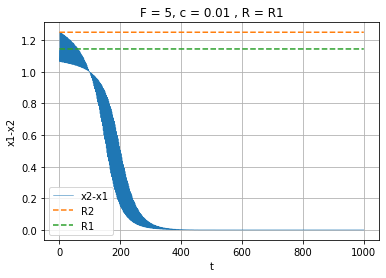

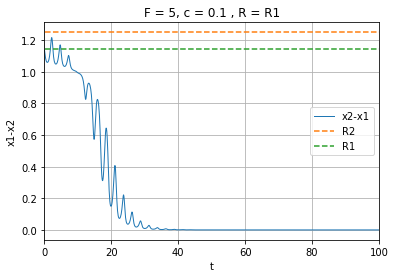

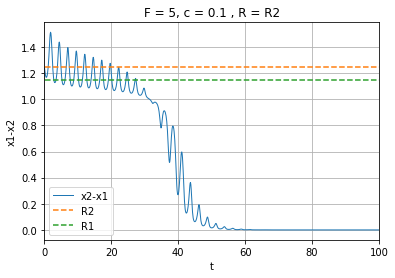

In [2]:
''' R1 = 1.14434, R2 = 1.25 c, F e spaziatura iniziale variabili.
    L'idea è di aggiungere una periodicità pigreco al caso studiato in Fig_11_a'''


my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_5.0__R_1.14434__R2_1.14434__R3_1.25__c_0.01.dat"
                      ,sep=' ')
data = np.array(my_file) 
plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 5, c = 0.01 , R = R1')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=0.5)
plt.grid()
plt.plot(data[:,0], 1.25*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], 1.14434*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.legend()
plt.show()


my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_5.0__R_1.14434__R2_1.14434__R3_1.25__c_0.1.dat"
                      ,sep=' ')
data = np.array(my_file) 
plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 5, c = 0.1 , R = R1')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], 1.25*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], 1.14434*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.legend()
plt.xlim([0,100])
plt.show()

my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_5.0__R_1.25__R2_1.14434__R3_1.25__c_0.1.dat"
                      ,sep=' ')
data = np.array(my_file) 
plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 5, c = 0.1 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], 1.25*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], 1.14434*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.legend()
plt.xlim([0,100])
plt.show()

La barriera di potenziale è :  0.0008095790967677986


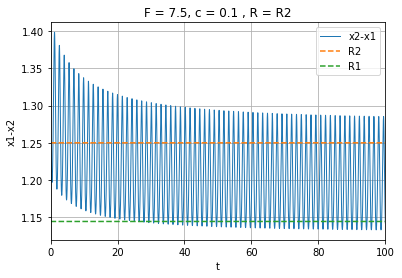

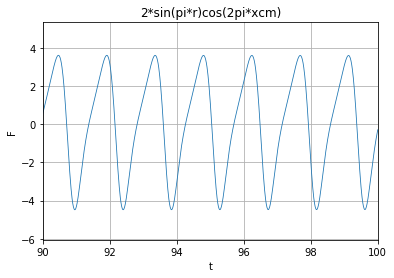

In [3]:
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.5__R_1.25__R2_1.14434__R3_1.25__c_0.1.dat"
                      ,sep=' ')
data = np.array(my_file) 

R1 = 1.14434
R2 = 1.25
c = 0.1

delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, c = 0.1 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,100])
plt.legend()
plt.show()


start=0
end=10000
#forza sin(r)cos(xcm)
y = -2*np.pi*np.sin(np.pi*(-data[start:end,2]+data[start:end,3]))*np.cos(np.pi*(data[start:end,2]+data[start:end,3]))

plt.xlabel('t')
plt.ylabel('F')
plt.title('2*sin(pi*r)cos(2pi*xcm)')
plt.plot(data[start:end,0], y, linewidth=0.8)
plt.xlim([90,100])
plt.grid()
plt.show()

0.6914036554440772
La frequenza armonica in un intorno di R2 è :  0.15501866024139546


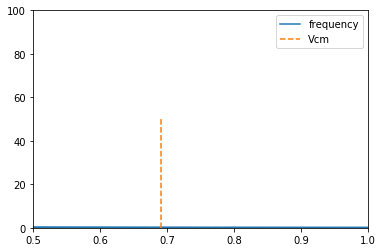

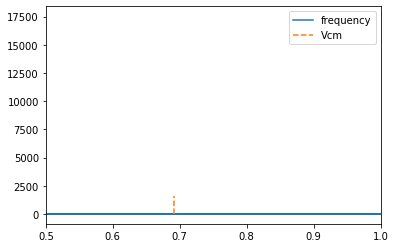

In [4]:
from scipy.fft import fft, fftfreq

vcm = np.mean(data[start:end,4]+data[start:end,5])/2
print(vcm)

w = pow(12*c*(pow(R2,4) - pow(R2,2)*pow(R1,2))*2, 1/2)/(2*np.pi)
print('La frequenza armonica in un intorno di R2 è : ' ,w)


R = fft(r[start:end])
freqr = fftfreq(end-start)*10
plt.plot(freqr, np.abs(R),label='frequency')
plt.plot([vcm,vcm],[0,50],label='Vcm',linestyle='dashed')
plt.legend()
plt.xlim([0.5,1])
plt.ylim([0,100])
plt.show()

Y = fft(y)
freqr = fftfreq(len(y))*10
plt.plot(freqr, np.abs(Y),label='frequency')
plt.plot([vcm,vcm],[0,1600],label='Vcm',linestyle='dashed')
plt.xlim([0.5,1])
plt.legend()
plt.show()


La barriera di potenziale è :  0.008095790967677985


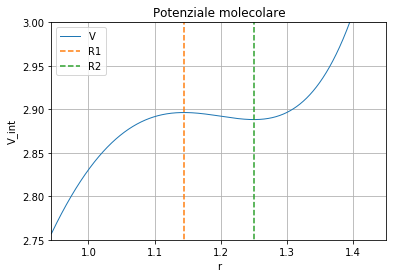

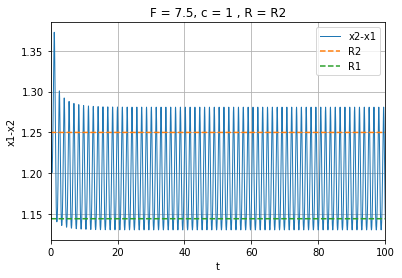

In [5]:
'Aumento il prefattore per ottenere una barriera via via più grande:  c = 1'

my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.5__R_1.25__R2_1.14434__R3_1.25__c_1.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

R1 = 1.14434
R2 = 1.25
c = 1

delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)

plt.xlabel('r')
plt.ylabel('V_int')
plt.title('Potenziale molecolare')
x = np.linspace(0,R2+0.5, 10000)
V = c*(x**6 - 1.5*(R1**2 + R2**2)*x**4 + 3*(R1*R2*x)**2 )
plt.plot(x, V , label='V',linewidth=1)
plt.plot([R1,R1],[0,50],label='R1',linestyle='dashed')
plt.plot([R2,R2],[0,50],label='R2',linestyle='dashed')
plt.grid()
plt.xlim([R1-0.2,R2+0.2])
plt.ylim([2.75,3])
plt.legend()
plt.show()

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, c = 1 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,100])
plt.legend()
plt.show()



La barriera di potenziale è :  0.040478954838389924


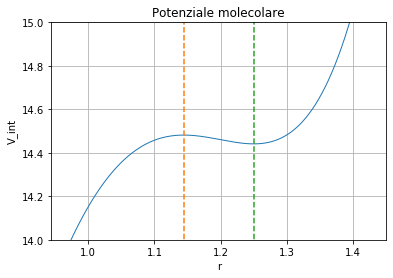

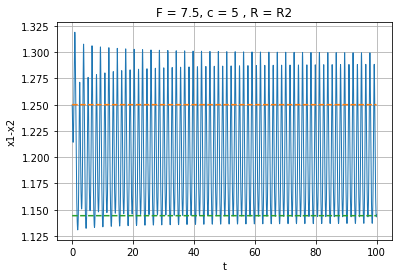

10000


In [6]:
'Aumento il prefattore per ottenere una barriera via via più grande:  c = 5'

my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.8__R_1.25__R2_1.14434__R3_1.25__c_5.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

R1 = 1.14434
R2 = 1.25
c = 5

delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)


plt.xlabel('r')
plt.ylabel('V_int')
plt.title('Potenziale molecolare')
x = np.linspace(0,R2+0.5, 10000)
V = c*(x**6 - 1.5*(R1**2 + R2**2)*x**4 + 3*(R1*R2*x)**2 )
plt.plot(x, V , label='V',linewidth=1)
plt.plot([R1,R1],[0,50],label='R1',linestyle='dashed')
plt.plot([R2,R2],[0,50],label='R2',linestyle='dashed')
plt.grid()
plt.xlim([R1-0.2,R2+0.2])
plt.ylim([14,15])
plt.show()

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, c = 5 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
#plt.xlim([0,100])
plt.show()
print(len(r))


0.7247061113740808
La frequenza armonica in un intorno di R2 è :  1.0961474586714415


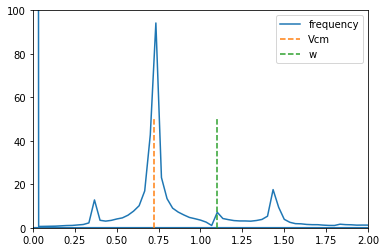

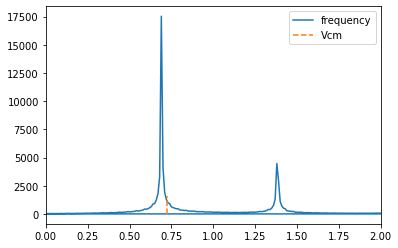

In [7]:
from scipy.fft import fft, fftfreq
start= 7000
end=9999
vcm = (data[end,2]+data[end,3]-data[start,2]-data[start,3])/2*(data[end,0]-data[start,0])
vcm = np.mean(data[start:end,4]+data[start:end,5])/2
print(vcm)


w = pow(12*c*(pow(R2,4) - pow(R2,2)*pow(R1,2))*2, 1/2)/(2*np.pi)
print('La frequenza armonica in un intorno di R2 è : ' ,w)


R = fft(r[start:end])
freqr = fftfreq(end-start)*100
plt.plot(freqr, np.abs(R),label='frequency')
plt.plot([vcm,vcm],[0,50],label='Vcm',linestyle='dashed')
plt.plot([w,w],[0,50],label='w',linestyle='dashed')
plt.legend()
plt.xlim([0,2])
plt.ylim([0,100])
plt.show()

Y = fft(y)
freqr = fftfreq(len(y))*100
plt.plot(freqr, np.abs(Y),label='frequency')
plt.plot([vcm,vcm],[0,1600],label='Vcm',linestyle='dashed')
plt.xlim([0,2])
plt.legend()
plt.show()


La barriera di potenziale è :  0.08095790967677985


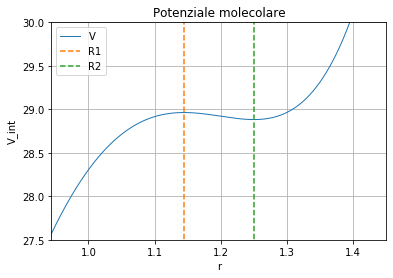

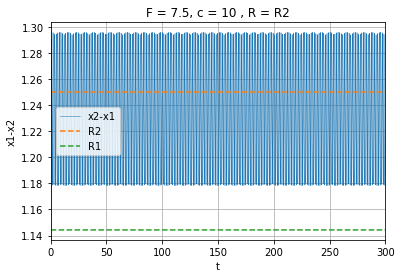

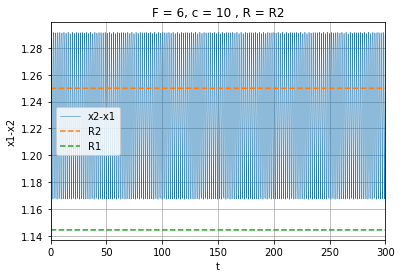

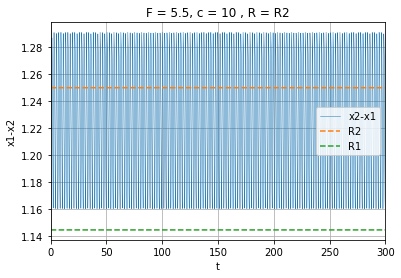

/home/alessandro/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


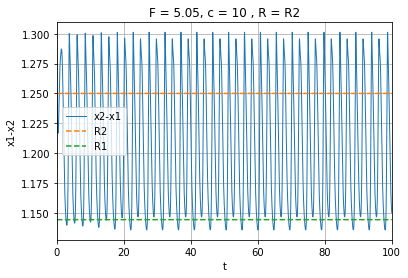

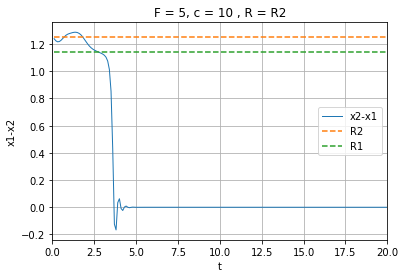

In [8]:
'Aumento il prefattore per ottenere una barriera via via più grande:  c = 10'

'Noto che diminuendo la forza aumenta la ampiezza della oscillazione!'

my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.5__R_1.25__R2_1.14434__R3_1.25__c_10.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

R1 = 1.14434
R2 = 1.25
c = 10

delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)


plt.xlabel('r')
plt.ylabel('V_int')
plt.title('Potenziale molecolare')
x = np.linspace(0,R2+0.5, 10000)
V = c*(x**6 - 1.5*(R1**2 + R2**2)*x**4 + 3*(R1*R2*x)**2 )
plt.plot(x, V , label='V',linewidth=1)
plt.plot([R1,R1],[0,50],label='R1',linestyle='dashed')
plt.plot([R2,R2],[0,50],label='R2',linestyle='dashed')
plt.grid()
plt.xlim([R1-0.2,R2+0.2])
plt.ylim([27.5,30])
plt.legend()
plt.show()

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, c = 10 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=0.5)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,300])
plt.legend()
plt.show()


my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_6.0__R_1.25__R2_1.14434__R3_1.25__c_10.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 6, c = 10 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=0.5)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,300])
plt.legend()
plt.show()



my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_5.5__R_1.25__R2_1.14434__R3_1.25__c_10.0.dat"
                      ,sep=' ')
data = np.array(my_file) 


plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 5.5, c = 10 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=0.5)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,300])
plt.legend()
plt.show()



my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_5.05__R_1.25__R2_1.14434__R3_1.25__c_10.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 5.05, c = 10 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,100])
plt.legend()
plt.show()




my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_5.0__R_1.25__R2_1.14434__R3_1.25__c_10.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 5, c = 10 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,20])
plt.legend()
plt.show()

La barriera di potenziale è :  0.12143686451516977


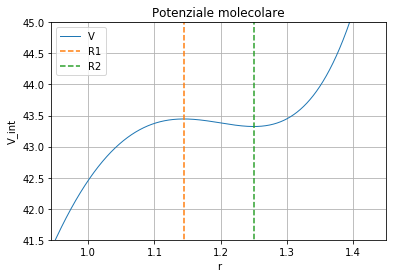

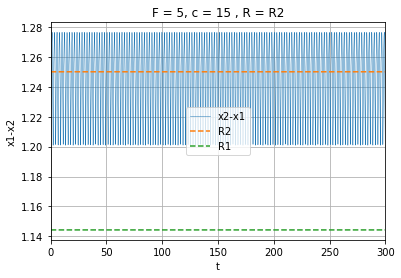

0.44678591476418744
La frequenza armonica in un intorno di R2 è :  1.898583091006443


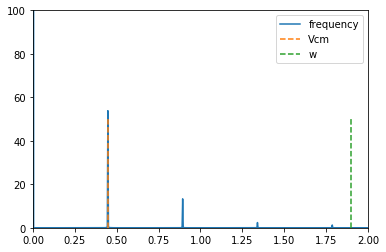

In [9]:
'Aumento il prefattore per ottenere una barriera via via più grande:  c = 15'

my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_5.0__R_1.25__R2_1.14434__R3_1.25__c_15.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

R1 = 1.14434
R2 = 1.25
c = 15

delta = (c/2.)*(pow(R2,6)-pow(R1,6)+3*pow(R2,2)*pow(R1,4)-3*pow(R2,4)*pow(R1,2))
print('La barriera di potenziale è : ' ,delta)

plt.xlabel('r')
plt.ylabel('V_int')
plt.title('Potenziale molecolare')
x = np.linspace(0,R2+0.5, 10000)
V = c*(x**6 - 1.5*(R1**2 + R2**2)*x**4 + 3*(R1*R2*x)**2 )
plt.plot(x, V , label='V',linewidth=1)
plt.plot([R1,R1],[0,50],label='R1',linestyle='dashed')
plt.plot([R2,R2],[0,50],label='R2',linestyle='dashed')
plt.grid()
plt.xlim([R1-0.2,R2+0.2])
plt.ylim([41.5,45])
plt.legend()
plt.show()

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 5, c = 15 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=0.5)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,300])
plt.legend()
plt.show()

vcm = np.mean(data[start:end,4]+data[start:end,5])/2
print(vcm)

w = pow(12*c*(pow(R2,4) - pow(R2,2)*pow(R1,2))*2, 1/2)/(2*np.pi)
print('La frequenza armonica in un intorno di R2 è : ' ,w)


R = fft(r[start:end])
freqr = fftfreq(end-start)*10
plt.plot(freqr, np.abs(R),label='frequency')
plt.plot([vcm,vcm],[0,50],label='Vcm',linestyle='dashed')
plt.plot([w,w],[0,50],label='w',linestyle='dashed')
plt.legend()
plt.xlim([0,2])
plt.ylim([0,100])
plt.show()


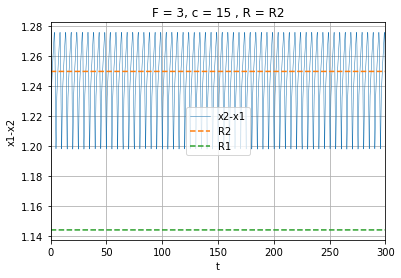

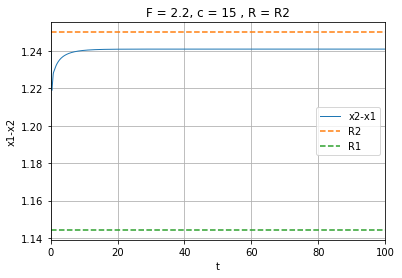

In [10]:
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_3.0__R_1.25__R2_1.14434__R3_1.25__c_15.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 3, c = 15 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=0.5)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,300])
plt.legend()
plt.show()



my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_2.2__R_1.25__R2_1.14434__R3_1.25__c_15.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 2.2, c = 15 , R = R2')
r = -data[:,2]+data[:,3]
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,100])
plt.legend()
plt.show()

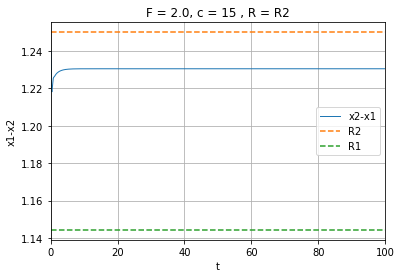

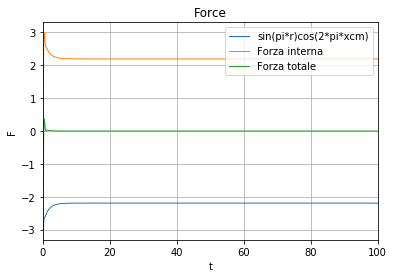

In [11]:
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_2.0__R_1.25__R2_1.14434__R3_1.25__c_15.0.dat"
                      ,sep=' ')
data = np.array(my_file) 

start=0
end = 1000
R1=1.14434
R2=1.25
c=15.0

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 2.0, c = 15 , R = R2')
r = -data[:,2]+data[:,3]
xcm = (data[:,2]+data[:,3])/2
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([0,100])
plt.legend()
plt.show()

#forza 
y1 = -2*np.pi*np.sin(np.pi*r)*np.cos(np.pi*xcm*2)
y2 = -2*c*6*(pow(r,5) - (R1**2+R2**2)*pow(r,3)+ r*(R1*R2)**2)
plt.xlabel('t')
plt.ylabel('F')
plt.title('Force')
plt.plot(data[:,0], y1, linewidth=1, label='sin(pi*r)cos(2*pi*xcm)')
plt.plot(data[:,0], y2, linewidth=1 , label='Forza interna')
plt.plot(data[:,0], y2+y1, linewidth=1 , label='Forza totale')
plt.xlim([0,100])
plt.grid()
plt.legend()
plt.show()


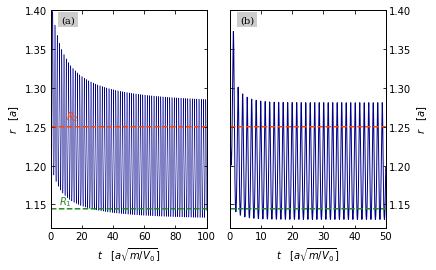

In [12]:
R1 = 1.14434
R2 = 1.25



#xcm e r nella sullo stesso grafico
fig, (ax1, ax2) = plt.subplots(1,2)

my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.5__R_1.25__R2_1.14434__R3_1.25__c_0.1.dat"
                      ,sep=' ')
data = np.array(my_file) 
r = -data[:,2]+data[:,3]
ax1.plot(data[:,0], r , label='$x_2-x_1$', color ='darkblue',linewidth=0.5)
ax1.plot(data[:,0], R2*np.ones(len(data[:,0])),'orangered', label='$R_2$',linestyle='dashed')
ax1.plot(data[:,0], R1*np.ones(len(data[:,0])), 'forestgreen',label='$R_1$',linestyle='dashed')
ax1.text(10, 1.26, '$R_2$',color='orangered')
ax1.text(5, 1.15, '$R_1$', color='forestgreen')
ax1.set(ylabel='$r \quad [a]$', ylim = [1.12,1.4])

ax1R = ax1.twinx()
ax1T = ax1.twiny()
ax1.tick_params(direction='in')
ax1T.tick_params(direction='in')
ax1R.tick_params(direction='in')
ax1R.yaxis.set_major_formatter(plt.NullFormatter())
ax1T.xaxis.set_major_formatter(plt.NullFormatter())
ax1R.set(ylim = [1.12,1.40])
ax1T.set(xlim=[0,100])
ax1R.set(xlim=[0,100])
ax1.set(xlabel='$t \quad [ a\sqrt{m/V_0} ] $')



my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.5__R_1.25__R2_1.14434__R3_1.25__c_1.0.dat"
                      ,sep=' ')
data = np.array(my_file) 
r = -data[:,2]+data[:,3]
ax2.plot(data[:,0], r , label='$x_2-x_1$', color ='darkblue',linewidth=1)
ax2.plot(data[:,0], R2*np.ones(len(data[:,0])),'orangered', label='$R_2$',linestyle='dashed')
ax2.plot(data[:,0], R1*np.ones(len(data[:,0])), 'forestgreen',label='$R_1$',linestyle='dashed')
ax2.set( ylim = [1.12,1.4])

ax2R = ax2.twinx()
ax2T = ax2.twiny()
ax2.tick_params(direction='in')
ax2T.tick_params(direction='in')
ax2R.tick_params(direction='in')
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2T.xaxis.set_major_formatter(plt.NullFormatter())
ax2R.set(xlim=[0,50])
ax2T.set(xlim=[0,50])
ax2R.set(ylabel='$r \quad [a]$',ylim = [1.12,1.4])
ax2.set(xlabel='$t \quad [ a\sqrt{m/V_0} ] $')

trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.0, 1.0, '(a)', transform=ax1.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))
ax2.text(0.0, 1.0, '(b)', transform=ax2.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))

plt.subplots_adjust(wspace=0.15, hspace=0)
plt.savefig("1.14434.pdf", dpi=300, bbox_inches='tight')
plt.savefig("1.14434.png", dpi=300, bbox_inches='tight')
plt.show()


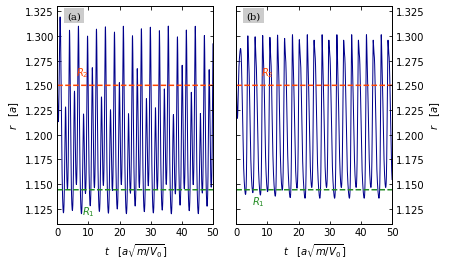

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.5__R_1.25__R2_1.14434__R3_1.25__c_5.0.dat"
                      ,sep=' ')
data = np.array(my_file) 
r = -data[:,2]+data[:,3]
ax1.plot(data[:,0], r , label='$x_2-x_1$', color ='darkblue',linewidth=1)
ax1.plot(data[:,0], R2*np.ones(len(data[:,0])),'orangered', label='$R_2$',linestyle='dashed')
ax1.plot(data[:,0], R1*np.ones(len(data[:,0])), 'forestgreen',label='$R_1$',linestyle='dashed')
ax1.text(6, 1.26, '$R_2$',color='orangered')
ax1.text(8, 1.12, '$R_1$', color='forestgreen')
ax1.set(ylabel='$r \quad [a]$', ylim = [1.11,1.33])

ax1R = ax1.twinx()
ax1T = ax1.twiny()
ax1.tick_params(direction='in')
ax1T.tick_params(direction='in')
ax1R.tick_params(direction='in')
ax1R.yaxis.set_major_formatter(plt.NullFormatter())
ax1T.xaxis.set_major_formatter(plt.NullFormatter())
ax1R.set(ylim = [1.11,1.33])
ax1T.set(xlim=[0,50])
ax1R.set(xlim=[0,50])
ax1.set(xlabel='$t \quad [ a\sqrt{m/V_0} ] $')


my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_5.05__R_1.25__R2_1.14434__R3_1.25__c_10.0.dat"
                      ,sep=' ')
data = np.array(my_file)
r = -data[:,2]+data[:,3]
ax2.plot(data[:,0], r , label='$r$', color ='darkblue',linewidth=1)
ax2.plot(data[:,0], R2*np.ones(len(data[:,0])),'orangered', label='$R_2$',linestyle='dashed')
ax2.plot(data[:,0], R1*np.ones(len(data[:,0])), 'forestgreen',label='$R_1$',linestyle='dashed')
ax2.text(8, 1.26, '$R_2$',color='orangered')
ax2.text(5, 1.13, '$R_1$', color='forestgreen')
ax2.set( ylim = [1.11,1.33])

ax2R = ax2.twinx()
ax2T = ax2.twiny()
ax2.tick_params(direction='in')
ax2T.tick_params(direction='in')
ax2R.tick_params(direction='in')
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2T.xaxis.set_major_formatter(plt.NullFormatter())
ax2R.set(xlim=[0,50])
ax2T.set(xlim=[0,50])
ax2R.set(ylabel='$r \quad [a]$',ylim = [1.11,1.33])
ax2.set(xlabel='$t \quad [ a\sqrt{m/V_0} ] $')

trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.0, 1.0, '(a)', transform=ax1.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))
ax2.text(0.0, 1.0, '(b)', transform=ax2.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))

plt.subplots_adjust(wspace=0.15, hspace=0)
plt.savefig("1.14434_b.pdf", dpi=300, bbox_inches='tight')
plt.savefig("1.14434_b.png", dpi=300, bbox_inches='tight')
plt.show()


0.6930337336191471 1.4429312044852705 144293.12044852704 355705.87955147296


/home/alessandro/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


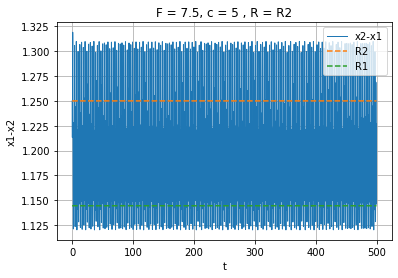

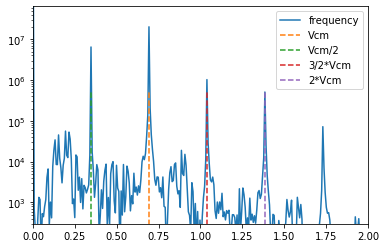

/home/alessandro/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


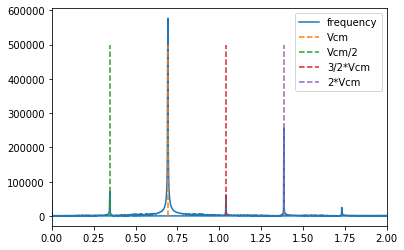

In [14]:
from scipy.fft import fft, fftfreq
start= 355588
end=499999
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_7.5__R_1.25__R2_1.14434__R3_1.25__c_5.0.dat"
                      ,sep=' ')
data = np.array(my_file)


r = -data[:,2]+data[:,3]
xcm = (data[:,2]+data[:,3])/2
y= -2*np.pi*np.sin(np.pi*r)*np.cos(np.pi*xcm*2)
vcm = (xcm[end] - xcm[start])/(data[end,0]-data[start,0])
print(vcm,1/vcm,100000/vcm, 499999-100000/vcm)

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 7.5, c = 5 , R = R2')
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
#plt.xlim([400,450])
plt.legend()
plt.show()

R = fft(r[start:end])
freqr = fftfreq(end-start)*1000
plt.plot(freqr, (np.abs(R))**2,label='frequency')
plt.plot([vcm,vcm],[0,500000],label='Vcm',linestyle='dashed')
plt.plot([vcm/2,vcm/2],[0,500000],label='Vcm/2',linestyle='dashed')
plt.plot([3*vcm/2,3*vcm/2],[0,500000],label='3/2*Vcm',linestyle='dashed')
plt.plot([2*vcm,vcm*2],[0,500000],label='2*Vcm',linestyle='dashed')
plt.yscale('log')
plt.legend()
plt.xlim([0,2])
plt.ylim([300,8000**2])
plt.show()

Y = fft(y)
freqr = fftfreq(len(y))*1000
plt.plot(freqr, np.abs(Y),label='frequency')
plt.plot([vcm,vcm],[0,500000],label='Vcm',linestyle='dashed')
plt.plot([vcm/2,vcm/2],[0,500000],label='Vcm/2',linestyle='dashed')
plt.plot([3*vcm/2,3*vcm/2],[0,500000],label='3/2*Vcm',linestyle='dashed')
plt.plot([2*vcm,vcm*2],[0,500000],label='2*Vcm',linestyle='dashed')
plt.legend()
plt.xlim([0,2])
#plt.ylim([0,300000])
plt.legend()
plt.show()


0.4211790296258884 2.374287249980723 118714.36249903616 381284.6375009639


/home/alessandro/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


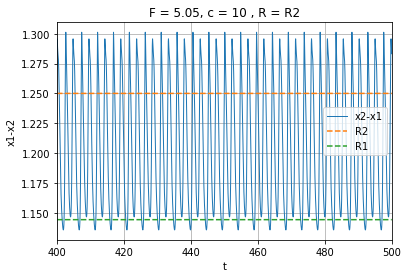

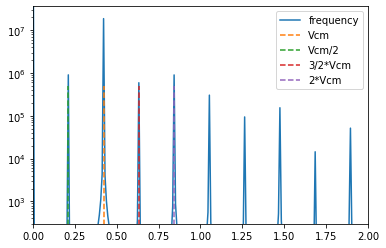

/home/alessandro/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


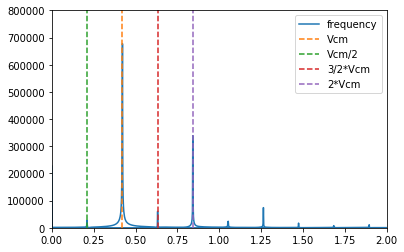

In [15]:
from scipy.fft import fft, fftfreq
start= 381331
end=499999
my_file = pd.read_csv("output___n_2__gam_10.0__U0_1.0__F_5.05__R_1.25__R2_1.14434__R3_1.25__c_10.0.dat"
                      ,sep=' ')
data = np.array(my_file)


r = -data[:,2]+data[:,3]
xcm = (data[:,2]+data[:,3])/2
y= -2*np.pi*np.sin(np.pi*r)*np.cos(np.pi*xcm*2)
vcm = (xcm[end] - xcm[start])/(data[end,0]-data[start,0])
print(vcm,1/vcm,50000/vcm, 499999-50000/vcm)

plt.xlabel('t')
plt.ylabel('x1-x2')
plt.title('F = 5.05, c = 10 , R = R2')
plt.plot(data[:,0], r , label='x2-x1',linewidth=1)
plt.grid()
plt.plot(data[:,0], R2*np.ones(len(data[:,0])), label='R2',linestyle='dashed')
plt.plot(data[:,0], R1*np.ones(len(data[:,0])), label='R1',linestyle='dashed')
plt.xlim([400,500])
plt.legend()
plt.show()

R = fft(r[start:end])
freqr = fftfreq(end-start)*1000
plt.plot(freqr, np.abs(R)**2,label='frequency')
plt.plot([vcm,vcm],[0,500000],label='Vcm',linestyle='dashed')
plt.plot([vcm/2,vcm/2],[0,500000],label='Vcm/2',linestyle='dashed')
plt.plot([3*vcm/2,3*vcm/2],[0,500000],label='3/2*Vcm',linestyle='dashed')
plt.plot([2*vcm,vcm*2],[0,500000],label='2*Vcm',linestyle='dashed')
plt.legend()
plt.yscale('log')
plt.xlim([0,2])
plt.ylim([300,6000**2])
plt.show()

Y = fft(y)
freqr = fftfreq(len(y))*1000
plt.plot(freqr, np.abs(Y),label='frequency')
plt.plot([vcm,vcm],[0,5000000],label='Vcm',linestyle='dashed')
plt.plot([vcm/2,vcm/2],[0,5000000],label='Vcm/2',linestyle='dashed')
plt.plot([3*vcm/2,3*vcm/2],[0,5000000],label='3/2*Vcm',linestyle='dashed')
plt.plot([2*vcm,vcm*2],[0,5000000],label='2*Vcm',linestyle='dashed')
plt.xlim([0,2])
plt.ylim([0,800000])
plt.legend()
plt.show()
